In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [262]:
surya = pd.read_csv('Fraud_check.csv')
surya

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [263]:
surya.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [264]:
surya.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [265]:
surya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [266]:
surya.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [267]:
surya.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [268]:
#sn.pairplot(surya)

<Axes: >

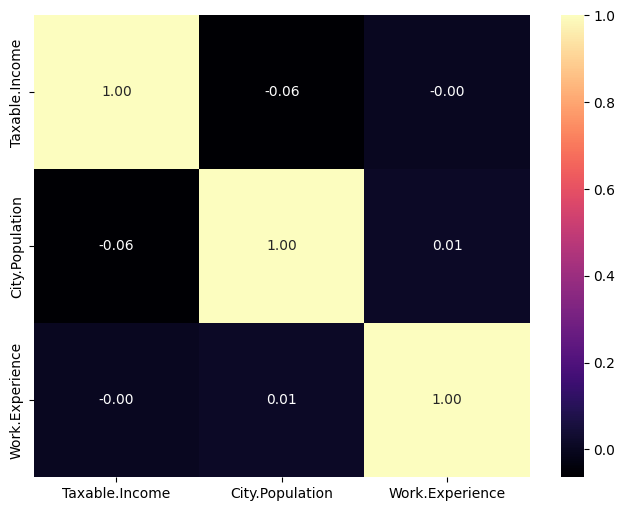

In [269]:
plt.figure(figsize = (8, 6));
sn.heatmap(surya.corr(), cmap='magma', annot=True, fmt=".2f")

In [270]:
surya.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [271]:
surya=surya.rename(columns={"Marital.Status" : "Marital Status", "Taxable.Income" : "Income", 'City.Population' : "Population",
       'Work.Experience' : "Experience"})

<Axes: xlabel='Experience', ylabel='Density'>

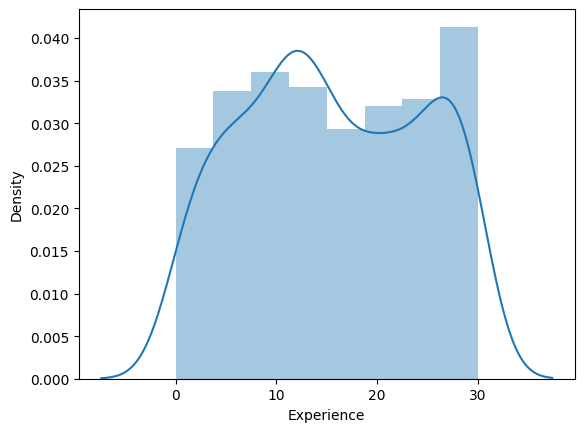

In [272]:
import warnings
warnings.filterwarnings('ignore')
sn.distplot(surya['Experience'])

<Axes: xlabel='Population', ylabel='Density'>

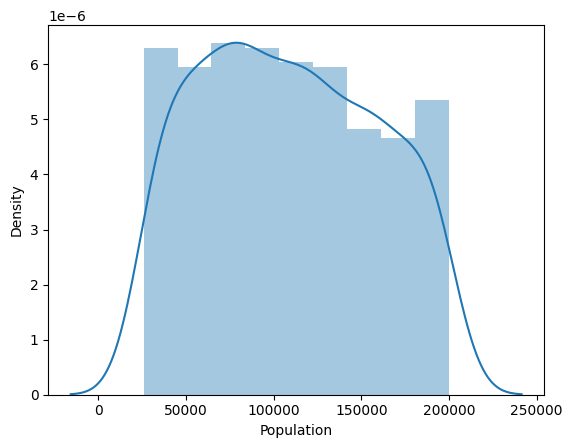

In [273]:
sn.distplot(surya['Population'])

In [274]:
surya

,Undergrad,Marital Status,Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [275]:
surya=pd.get_dummies(surya,columns=['Undergrad','Marital Status','Urban'],drop_first=True)

In [276]:
surya

,Income,Population,Experience,Undergrad_YES,Marital Status_Married,Marital Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [277]:
for labels in range(0,len(surya['Income'])):
    if surya['Income'].iloc[labels]<=30000:
        surya['Income'].iloc[labels]='Risky'
    else:
        surya['Income'].iloc[labels]='Good'

In [278]:
surya

,Income,Population,Experience,Undergrad_YES,Marital Status_Married,Marital Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,Good,39492,7,1,0,0,1
596,Good,55369,2,1,0,0,1
597,Good,154058,0,0,0,0,1
598,Good,180083,17,1,1,0,0


In [279]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [280]:
surya_ = sc.fit_transform(surya.iloc[:,1:])

In [281]:
surya_stand = pd.DataFrame(surya_)

In [282]:
surya_stand

,0,1,2,3,4,5
0,-1.178521,-0.629143,-1.040833,-0.691254,1.328524,0.993355
1,0.508500,0.276370,0.960769,-0.691254,-0.752715,0.993355
2,1.033109,1.634639,-1.040833,1.446646,-0.752715,0.993355
3,1.696831,-0.063197,0.960769,-0.691254,1.328524,0.993355
4,-1.630532,1.408261,-1.040833,1.446646,-0.752715,-1.006689
...,...,...,...,...,...,...
595,-1.390432,-0.968710,0.960769,-0.691254,-0.752715,0.993355
596,-1.071672,-1.534655,0.960769,-0.691254,-0.752715,0.993355
597,0.909696,-1.761033,-1.040833,-0.691254,-0.752715,0.993355
598,1.432197,0.163181,0.960769,1.446646,-0.752715,-1.006689


In [283]:
x= surya_stand.iloc[:,0:6]
y = surya['Income']

In [284]:
x

,0,1,2,3,4,5
0,-1.178521,-0.629143,-1.040833,-0.691254,1.328524,0.993355
1,0.508500,0.276370,0.960769,-0.691254,-0.752715,0.993355
2,1.033109,1.634639,-1.040833,1.446646,-0.752715,0.993355
3,1.696831,-0.063197,0.960769,-0.691254,1.328524,0.993355
4,-1.630532,1.408261,-1.040833,1.446646,-0.752715,-1.006689
...,...,...,...,...,...,...
595,-1.390432,-0.968710,0.960769,-0.691254,-0.752715,0.993355
596,-1.071672,-1.534655,0.960769,-0.691254,-0.752715,0.993355
597,0.909696,-1.761033,-1.040833,-0.691254,-0.752715,0.993355
598,1.432197,0.163181,0.960769,1.446646,-0.752715,-1.006689


In [285]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income, Length: 600, dtype: object

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [288]:
model = RandomForestClassifier(criterion = 'entropy',max_depth = 5,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [289]:
model.feature_importances_

array([0.46416979, 0.32407903, 0.06368854, 0.0535609 , 0.03696309,
       0.05753864])

In [290]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [291]:
pd.crosstab(y_test,preds)

col_0,Good
Income,
Good,94
Risky,26


In [292]:
np.mean(preds==y_test)

0.7833333333333333

In [293]:
model = RandomForestClassifier(criterion = 'gini',max_depth = 6,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [294]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

Good    120
dtype: int64

In [295]:
pd.crosstab(y_test,preds)

col_0,Good
Income,
Good,94
Risky,26


In [296]:
np.mean(preds==y_test)

0.7833333333333333

In [297]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = RandomForestClassifier(criterion='entropy', max_depth= max_depth, random_state= 42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [298]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.795833,0.783333
3,4,0.795833,0.783333
4,5,0.795833,0.783333
5,6,0.806250,0.783333
6,7,0.818750,0.783333
7,8,0.866667,0.775000
8,9,0.916667,0.766667
9,10,0.952083,0.758333


In [299]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = RandomForestClassifier(criterion='gini', max_depth= max_depth, random_state= 42)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [300]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.795833,0.783333
3,4,0.795833,0.783333
4,5,0.797917,0.783333
5,6,0.812500,0.783333
6,7,0.845833,0.775000
7,8,0.881250,0.766667
8,9,0.931250,0.766667
9,10,0.972917,0.750000


KFold

In [301]:
num_trees = 82
max_features = 4
kfold = KFold(n_splits=7, random_state=27, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features,random_state=27)

In [302]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7517295290209107


In [303]:
from sklearn.ensemble import AdaBoostClassifier

In [304]:
num_trees = 3
kfold = KFold(n_splits=5, random_state=42, shuffle = True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333333
